# **KASDD F1 Lap time - Biasa Aja**

# Import Dataset

In [117]:
# import library dan data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as scp
import scipy.cluster.hierarchy as shc
import datetime
import time

from decimal import Decimal
from numpy.polynomial.polynomial import polyfit
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.feature_selection import chi2, mutual_info_regression, mutual_info_classif, SelectKBest, mutual_info_regression, SelectPercentile, mutual_info_regression, f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, KFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import RepeatedStratifiedKFold


f1_data = pd.read_csv("f1_train.csv")
f1_data = f1_data.drop(axis=1, columns=["ID"])
f1_data

,Time,LapTime,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,...,Deleted,DeletedReason,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Pos_cat
0,0 days 02:26:25.496000,0 days 00:01:40.943000,6.0,0 days 02:25:08.325000,NaN,0 days 00:00:46.163000,0 days 00:00:28.979000,0 days 00:00:25.801000,0 days 02:25:36.926000,0 days 02:26:05.905000,...,False,NaN,17.1,68.0,1008.0,False,24.8,157,3.0,Participant
1,0 days 01:13:51.732000,0 days 00:01:48.067000,1.0,NaN,NaN,0 days 00:00:39.129000,0 days 00:00:43.601000,0 days 00:00:25.337000,0 days 01:12:42.794000,0 days 01:13:26.395000,...,False,NaN,25.0,49.0,1008.5,False,43.3,275,1.0,Podium
2,0 days 02:22:35.139000,0 days 00:01:22.881000,2.0,NaN,NaN,0 days 00:00:28.890000,0 days 00:00:18.554000,0 days 00:00:35.437000,0 days 02:21:41.150000,0 days 02:21:59.704000,...,False,NaN,17.6,57.0,1018.2,False,29.9,0,0.6,Participant
3,0 days 01:03:36.822000,0 days 00:01:31.585000,1.0,0 days 00:14:44.885000,NaN,NaN,0 days 00:00:28.929000,0 days 00:00:30.478000,NaN,0 days 01:03:06.412000,...,False,NaN,17.6,67.0,1007.7,False,29.5,135,1.8,Podium
4,0 days 01:45:40.072000,0 days 00:01:34.742000,2.0,NaN,NaN,0 days 00:00:34.895000,0 days 00:00:29.874000,0 days 00:00:29.973000,0 days 01:44:40.174000,0 days 01:45:10.048000,...,False,NaN,26.1,55.0,1011.0,False,31.0,271,1.3,Point
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18783,0 days 01:27:00.913000,0 days 00:01:25.235000,2.0,NaN,NaN,0 days 00:00:30.620000,0 days 00:00:30.668000,0 days 00:00:23.947000,0 days 01:26:06.294000,0 days 01:26:36.962000,...,False,NaN,29.3,32.0,988.4,False,49.9,252,1.2,Participant
18784,0 days 01:21:32.309000,0 days 00:01:40.363000,1.0,NaN,NaN,0 days 00:00:29.488000,0 days 00:00:42.838000,0 days 00:00:28.037000,0 days 01:20:21.469000,0 days 01:21:04.307000,...,False,NaN,30.0,72.0,1009.0,False,36.8,145,1.1,Participant
18785,0 days 02:00:31.678000,0 days 00:01:52.495000,3.0,NaN,NaN,0 days 00:00:32.659000,0 days 00:00:49.567000,0 days 00:00:30.269000,0 days 01:59:11.871000,0 days 02:00:01.438000,...,False,NaN,17.6,66.0,966.7,False,30.3,146,1.1,Participant
18786,0 days 01:07:59.947000,0 days 00:01:25.938000,1.0,NaN,NaN,0 days 00:00:30.564000,0 days 00:00:31.370000,0 days 00:00:24.004000,0 days 01:07:04.556000,0 days 01:07:35.926000,...,False,NaN,28.8,33.0,988.5,False,50.1,134,1.5,Participant


In [118]:
f1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18788 entries, 0 to 18787
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                18788 non-null  object 
 1   LapTime             18498 non-null  object 
 2   Stint               18788 non-null  float64
 3   PitOutTime          1039 non-null   object 
 4   PitInTime           735 non-null    object 
 5   Sector1Time         18381 non-null  object 
 6   Sector2Time         18749 non-null  object 
 7   Sector3Time         18696 non-null  object 
 8   Sector1SessionTime  18344 non-null  object 
 9   Sector2SessionTime  18749 non-null  object 
 10  Sector3SessionTime  18696 non-null  object 
 11  SpeedI1             15871 non-null  float64
 12  SpeedI2             18749 non-null  float64
 13  SpeedFL             18013 non-null  float64
 14  SpeedST             17096 non-null  float64
 15  IsPersonalBest      18758 non-null  object 
 16  Comp

# Preprocessing

In [119]:
def cek_duplicates(df):
    if df.duplicated().sum() > 0:
        print("Terdapat", df.duplicated().sum(), "pasang data yang redundan")
        display(df[df.duplicated()])
    else:
        print("Tidak ada data yang redundan")

def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na*100 / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")

    else:
        print(missing_data[missing_data['Total'] > 0])

def cek_outlier(df):
    df_numerical = df.select_dtypes(include=['float64', 'int64']) 
    Q1 = df_numerical.quantile(0.25, numeric_only=True)
    Q3 = df_numerical.quantile(0.75, numeric_only=True)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df_numerical < lower_limit) | (df_numerical > upper_limit)

    # Menghitung dan menampilkan persentase outlier pada tiap atribut.
    percentage_outliers = (outliers.sum() / len(df)) * 100
    print("Persentase Outlier pada tiap atribut:")
    print(percentage_outliers)

### Handling Missing Value

In [120]:
cek_null(f1_data)

                    Total    Percent
IsPersonalBest         30   0.159676
SpeedI2                39   0.207579
Sector2SessionTime     39   0.207579
Sector2Time            39   0.207579
Sector3SessionTime     92   0.489674
Sector3Time            92   0.489674
LapTime               290   1.543538
Sector1Time           407   2.166276
Sector1SessionTime    444   2.363211
SpeedFL               775   4.124973
SpeedST              1692   9.005748
SpeedI1              2917  15.525868
PitOutTime          17749  94.469874
PitInTime           18053  96.087928
DeletedReason       18477  98.344688


> Atribut `PitOutTime`, `PitInTime`, dan `DeletedReason` memiliki persentase jumlah missing value mencapai lebih dari 90%. Oleh karena itu, atribut-atribut tersebut perlu di drop.

In [121]:
f1_data = f1_data.drop(axis=1, columns=['PitOutTime', 'PitInTime', 'DeletedReason'])

In [122]:
def show_data_type_and_distribution(df):
    print("Menampilkan informasi dataset dan tipe data")
    print('#'*50)
    df.info()
    print('#'*50)
    print("Menampilkan distribusi data numerik")
    numerics = ['SpeedI2', 'SpeedFL', 'SpeedST', 'SpeedI1']
    for col in numerics:
        df_feature = f1_data[col]
        plt.figure(figsize=(10,5))
        plt.title(f'Distribusi data {col}')
        sns.kdeplot(df_feature, fill=True)
        plt.show()
    print("Menampilkan Modus dari data kategorikal")
    categoricals = ["IsPersonalBest", "Sector2SessionTime", "Sector2Time","Sector3SessionTime", "Sector3Time", "LapTime", "Sector1Time", "Sector1SessionTime"]
    for col in categoricals:
        print(f"Mode for {col} = {f1_data[col].mode()[0]}")

Menampilkan informasi dataset dan tipe data
##################################################


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18788 entries, 0 to 18787
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                18788 non-null  object 
 1   LapTime             18498 non-null  object 
 2   Stint               18788 non-null  float64
 3   Sector1Time         18381 non-null  object 
 4   Sector2Time         18749 non-null  object 
 5   Sector3Time         18696 non-null  object 
 6   Sector1SessionTime  18344 non-null  object 
 7   Sector2SessionTime  18749 non-null  object 
 8   Sector3SessionTime  18696 non-null  object 
 9   SpeedI1             15871 non-null  float64
 10  SpeedI2             18749 non-null  float64
 11  SpeedFL             18013 non-null  float64
 12  SpeedST             17096 non-null  float64
 13  IsPersonalBest      18758 non-null  object 
 14  Compound            18788 non-null  object 
 15  TyreLife            18788 non-null  float64
 16  Fres

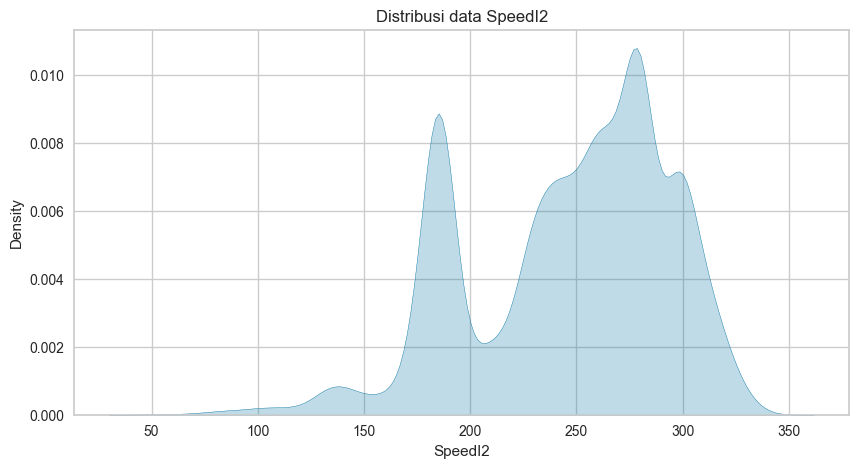

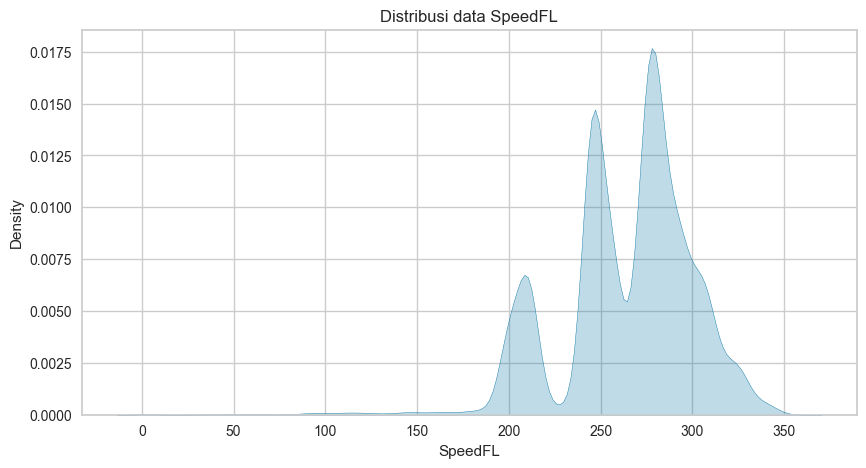

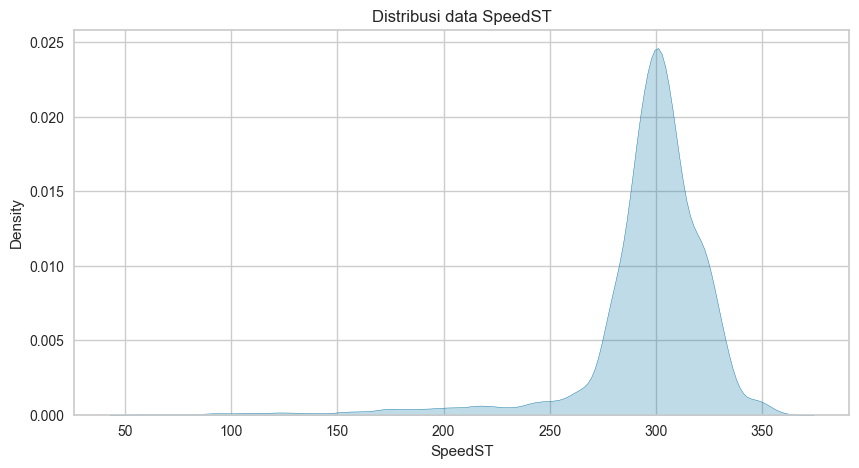

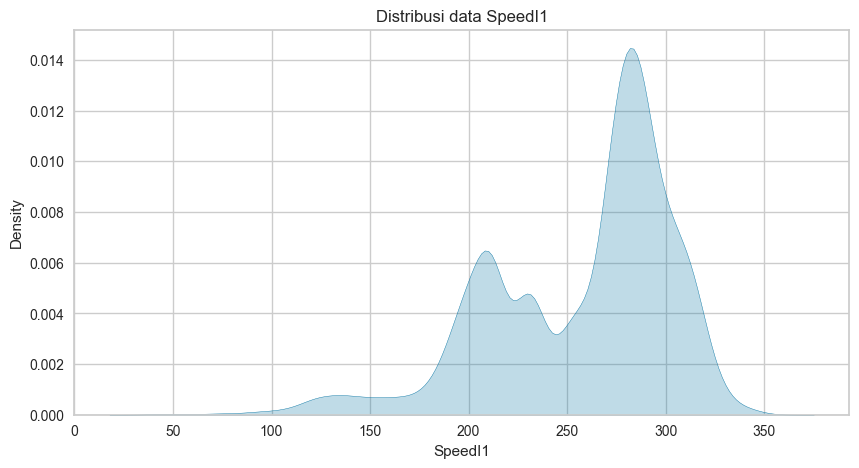

Menampilkan Modus dari data kategorikal
Mode for IsPersonalBest = False
Mode for Sector2SessionTime = 0 days 01:03:29.878000
Mode for Sector2Time = 0 days 00:00:29.905000
Mode for Sector3SessionTime = 0 days 01:06:09.122000
Mode for Sector3Time = 0 days 00:00:25.692000
Mode for LapTime = 0 days 00:01:16.993000
Mode for Sector1Time = 0 days 00:00:28.315000
Mode for Sector1SessionTime = 0 days 01:04:58.279000


In [123]:
show_data_type_and_distribution(f1_data)

In [124]:
def fill_null_mean(df):
    mean = df.mean()
    filled_df = df.fillna(mean)
    return filled_df
def fill_null_median(df):
    median = df.median()
    filled_df = df.fillna(median)
    return filled_df
def fill_null_mode(df):
    mode = df.mode()[0]
    filled_df = df.fillna(mode)
    return filled_df

In [125]:
f1_data['SpeedI2'] = fill_null_median(f1_data['SpeedI2'])
f1_data['SpeedFL'] = fill_null_median(f1_data['SpeedFL'])
f1_data['SpeedST'] = fill_null_mean(f1_data['SpeedST'])
f1_data['SpeedI1'] = fill_null_median(f1_data['SpeedI1'])
f1_data['IsPersonalBest'] = fill_null_mode(f1_data['IsPersonalBest'])
f1_data['Sector2SessionTime'] = fill_null_mode(f1_data['Sector2SessionTime'])
f1_data['Sector2Time'] = fill_null_mode(f1_data['Sector2Time'])
f1_data['Sector3SessionTime'] = fill_null_mode(f1_data['Sector3SessionTime'])
f1_data['Sector3Time'] = fill_null_mode(f1_data['Sector3Time'])
f1_data['LapTime'] = fill_null_mode(f1_data['LapTime'])
f1_data['Sector1Time'] = fill_null_mode(f1_data['Sector1Time'])
f1_data['Sector1SessionTime'] = fill_null_mode(f1_data['Sector1SessionTime'])

C:\Users\asus\AppData\Local\Temp\ipykernel_1152\129334964.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filled_df = df.fillna(mode)


In [126]:
cek_null(f1_data)

Tidak ditemukan missing value pada dataset


### Handling Duplicate Value

In [127]:
print("Jumlah duplikasi data : " + str(f1_data.duplicated().sum()))

Jumlah duplikasi data : 1


In [128]:
f1_data = f1_data.drop_duplicates()

### Handling Outliers

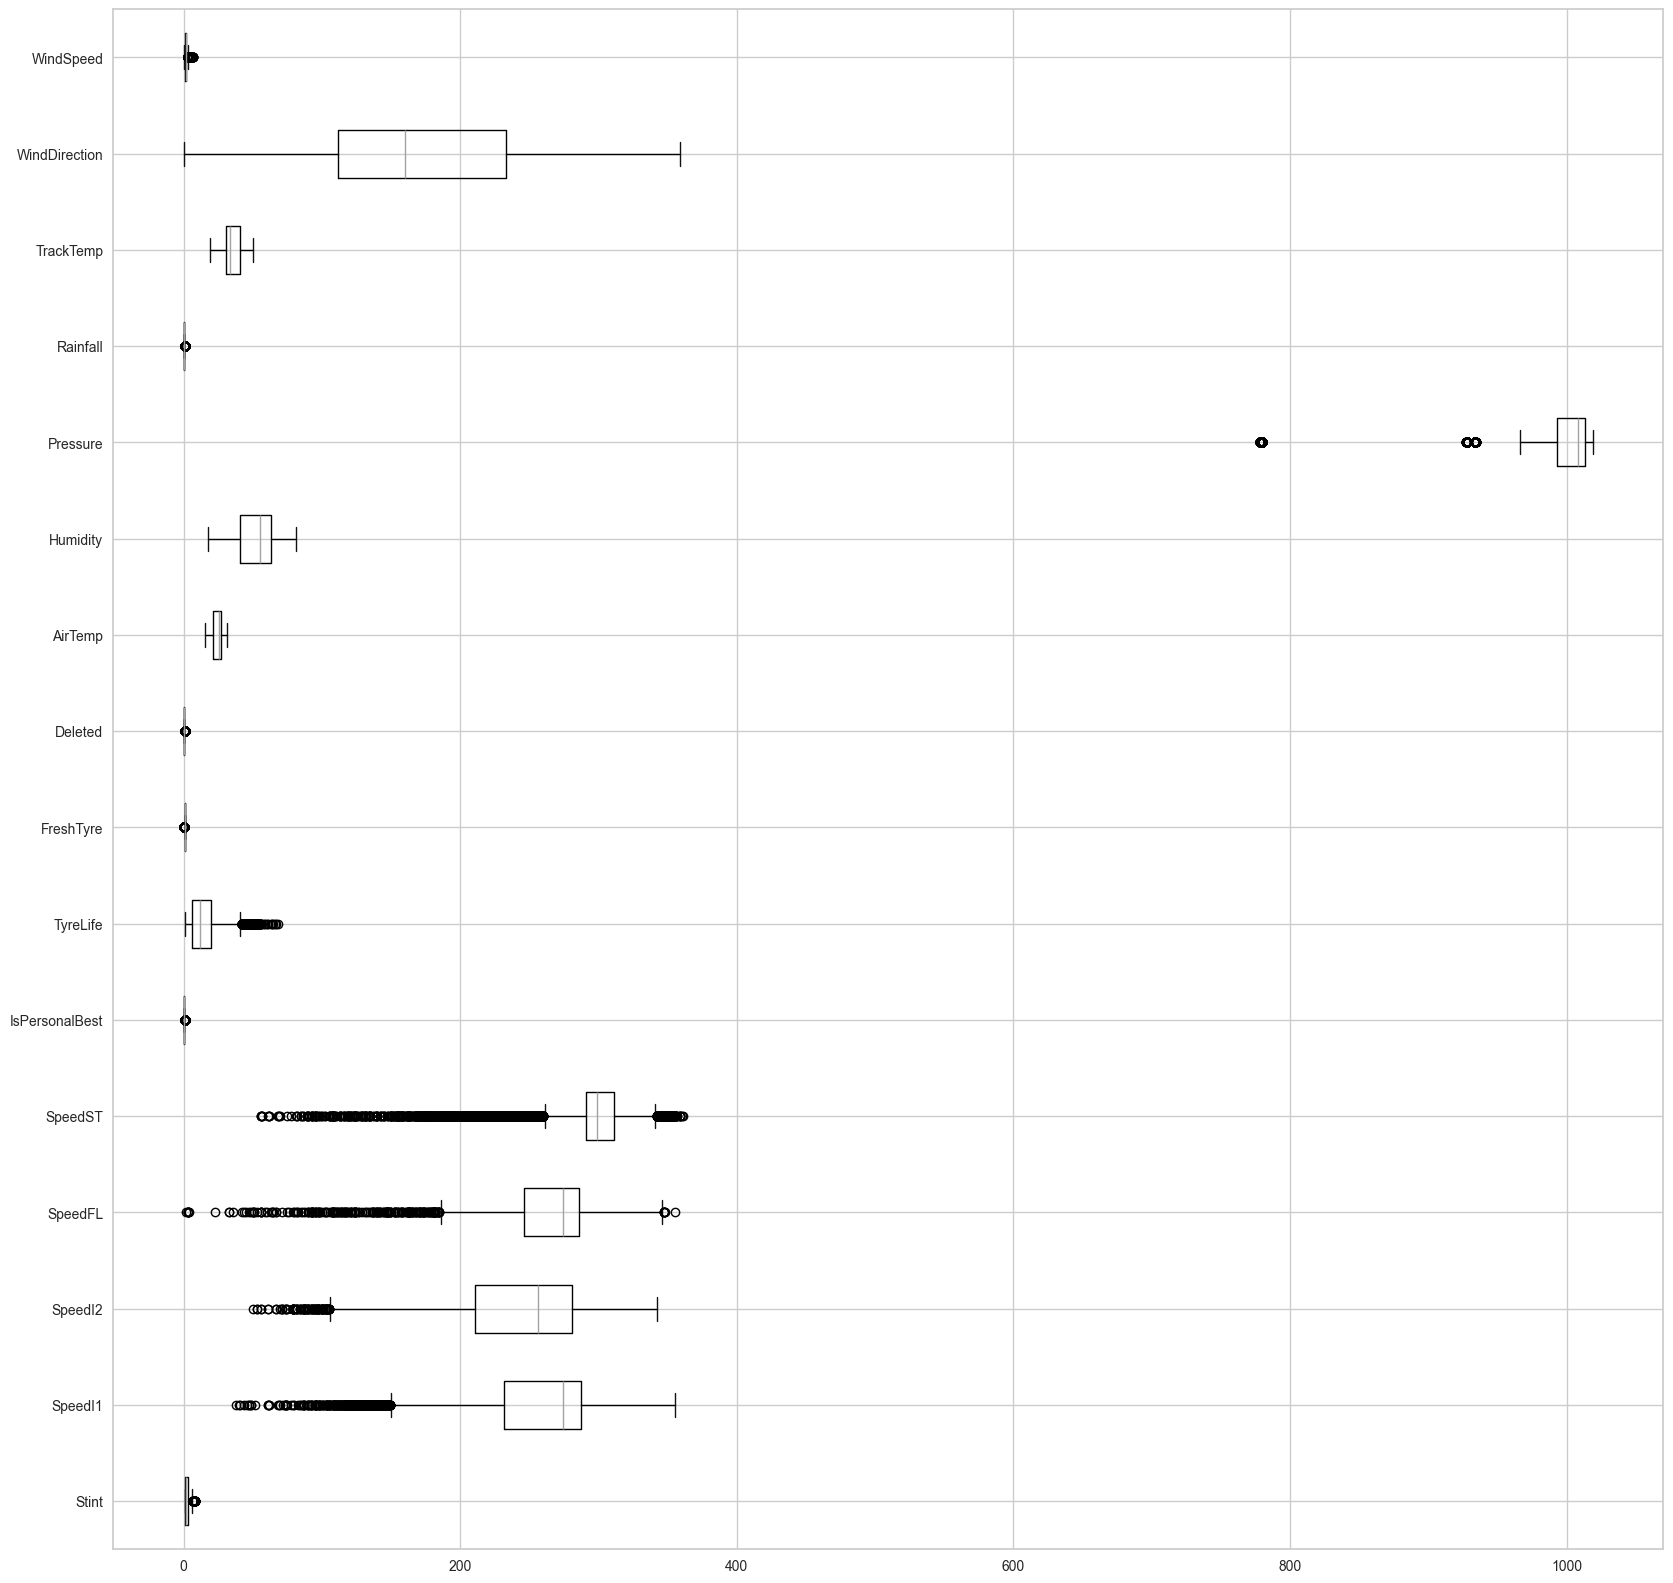

In [129]:
f1_data.boxplot(vert=False,figsize=(20,20))
plt.show()

In [130]:
laptime_numerical = f1_data.select_dtypes(include=['float64', 'int64']) 
Q1 = laptime_numerical.quantile(0.25)
Q3 = laptime_numerical.quantile(0.75)
IQR = Q3 - Q1

In [131]:
print(cek_outlier(f1_data))

Persentase Outlier pada tiap atribut:
Stint             0.298078
SpeedI1           2.746580
SpeedI2           0.548251
SpeedFL           1.320062
SpeedST           7.260340
TyreLife          1.948156
AirTemp           0.000000
Humidity          0.000000
Pressure         15.824772
TrackTemp         0.000000
WindDirection     0.000000
WindSpeed         8.026827
dtype: float64
None


> Atribut `Presure` digunakan untuk memprediksi `TyreLife`, sehingga tidak kami drop .

### Encoding Categorical Attributes

In [132]:
print("Menampilkan nilai unique yang terdapat pada setiap kolom kategorikal")
print('#'*70)
print()
for col in f1_data.select_dtypes(include=object).columns:
    print(col, f": {len(f1_data[col].unique())}", f1_data[col].unique())
    print("\n")

Menampilkan nilai unique yang terdapat pada setiap kolom kategorikal
######################################################################

Time : 18744 ['0 days 02:26:25.496000' '0 days 01:13:51.732000'
 '0 days 02:22:35.139000' ... '0 days 02:00:31.678000'
 '0 days 01:07:59.947000' '0 days 02:04:03.127000']


LapTime : 14761 ['0 days 00:01:40.943000' '0 days 00:01:48.067000'
 '0 days 00:01:22.881000' ... '0 days 00:01:25.235000'
 '0 days 00:01:52.495000' '0 days 00:02:25.892000']


Sector1Time : 11540 ['0 days 00:00:46.163000' '0 days 00:00:39.129000'
 '0 days 00:00:28.890000' ... '0 days 00:01:06.782000'
 '0 days 00:00:30.620000' '0 days 00:00:52.231000']


Sector2Time : 12067 ['0 days 00:00:28.979000' '0 days 00:00:43.601000'
 '0 days 00:00:18.554000' ... '0 days 00:01:09.507000'
 '0 days 00:00:49.567000' '0 days 00:00:53.937000']


Sector3Time : 10711 ['0 days 00:00:25.801000' '0 days 00:00:25.337000'
 '0 days 00:00:35.437000' ... '0 days 00:00:21.484000'
 '0 days 00:00:28.037000

In [133]:
f1_data['Compound'] = f1_data['Compound'].map({'INTERMEDIATE':1, 'MEDIUM':4, 'HARD':2, 'SOFT':3, 'WET':0})
f1_data['Pos_cat'] = f1_data['Pos_cat'].map({'Participant':0, 'Podium':2, 'Point':1})

In [134]:
def zero_days_remover (duration):
    return duration.replace('0 days ', '')

In [135]:
time_att = []
for col in f1_data.select_dtypes(include=object).columns:
    time_att.append(col)

In [136]:
time_att

['Time',
 'LapTime',
 'Sector1Time',
 'Sector2Time',
 'Sector3Time',
 'Sector1SessionTime',
 'Sector2SessionTime',
 'Sector3SessionTime',
 'LapStartTime']

In [137]:
for time in time_att:
    f1_data[time] = f1_data[time].apply(zero_days_remover)

Untuk memudahkan encoding waktu, kami menghilangkan 0 days karena seluruh data memiliki 0 days dan hal tersebut tidak membantu kami dalam melakukan encoding waktu

In [138]:
def time_converter (time_str):
    if '.' in time_str:
        time_str, milliseconds = time_str.split('.')
        milliseconds = int(milliseconds)
    else:
        milliseconds = 0

    x_time = datetime.datetime.strptime(time_str, '%H:%M:%S')

    total_seconds = datetime.timedelta(
        hours=x_time.hour,
        minutes=x_time.minute,
        seconds=x_time.second,
        microseconds=milliseconds / 1000  # Convert milliseconds to microseconds
    ).total_seconds()
    
    return total_seconds

In [139]:
for time in time_att:
    f1_data[time] = f1_data[time].apply(time_converter)

In [140]:
f1_data

,Time,LapTime,Stint,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,...,LapStartTime,Deleted,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Pos_cat
0,8785.000496,100.000943,6.0,46.000163,28.000979,25.000801,8736.000926,8765.000905,8791.000706,283.0,...,8684.000553,False,17.1,68.0,1008.0,False,24.8,157,3.0,0
1,4431.000732,108.000067,1.0,39.000129,43.000601,25.000337,4362.000794,4406.000395,4431.000732,199.0,...,4323.000665,False,25.0,49.0,1008.5,False,43.3,275,1.0,2
2,8555.000139,82.000881,2.0,28.000890,18.000554,35.000437,8501.000150,8519.000704,8555.000141,275.0,...,8472.000258,False,17.6,57.0,1018.2,False,29.9,0,0.6,0
3,3816.000822,91.000585,1.0,28.000315,28.000929,30.000478,3898.000279,3786.000412,3816.000927,266.0,...,3724.000960,False,17.6,67.0,1007.7,False,29.5,135,1.8,2
4,6340.000072,94.000742,2.0,34.000895,29.000874,29.000973,6280.000174,6310.000048,6340.000021,274.0,...,6245.000330,False,26.1,55.0,1011.0,False,31.0,271,1.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18783,5220.000913,85.000235,2.0,30.000620,30.000668,23.000947,5166.000294,5196.000962,5220.000909,276.0,...,5135.000678,False,29.3,32.0,988.4,False,49.9,252,1.2,0
18784,4892.000309,100.000363,1.0,29.000488,42.000838,28.000037,4821.000469,4864.000307,4892.000344,297.0,...,4791.000946,False,30.0,72.0,1009.0,False,36.8,145,1.1,0
18785,7231.000678,112.000495,3.0,32.000659,49.000567,30.000269,7151.000871,7201.000438,7231.000707,309.0,...,7119.000183,False,17.6,66.0,966.7,False,30.3,146,1.1,0
18786,4079.000947,85.000938,1.0,30.000564,31.000370,24.000004,4024.000556,4055.000926,4079.000930,256.0,...,3994.000009,False,28.8,33.0,988.5,False,50.1,134,1.5,0


In [141]:
boolean_columns = ['IsPersonalBest', 'FreshTyre', 'Deleted', 'Rainfall']
f1_data = pd.get_dummies(f1_data, columns = boolean_columns, drop_first=True) 
f1_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18787 entries, 0 to 18787
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 18787 non-null  float64
 1   LapTime              18787 non-null  float64
 2   Stint                18787 non-null  float64
 3   Sector1Time          18787 non-null  float64
 4   Sector2Time          18787 non-null  float64
 5   Sector3Time          18787 non-null  float64
 6   Sector1SessionTime   18787 non-null  float64
 7   Sector2SessionTime   18787 non-null  float64
 8   Sector3SessionTime   18787 non-null  float64
 9   SpeedI1              18787 non-null  float64
 10  SpeedI2              18787 non-null  float64
 11  SpeedFL              18787 non-null  float64
 12  SpeedST              18787 non-null  float64
 13  Compound             18787 non-null  int64  
 14  TyreLife             18787 non-null  float64
 15  LapStartTime         18787 non-null  floa

# **EKSPLORASI** 

Apakah penggunaan ‘Compound’ yang berbeda berpengaruh terhadap performa? 


>Performa dari suatu mobil F1 dapat ditentukan melalui waktu yang ditempuh mobil tersebut selama satu lap, yaitu atribut `LapTime`. Atribut ini juga kami pilih sebagai representasi performa yang dianalisis pengaruhnya oleh `Compound` karena dalam balapan F1, tipe compound yang berbeda tidak mungkin dipakai dalam satu lap yang sama. Oleh karena itu pada eksplorasi ini kami hanya mengambil atribut `Compound` dan `LapTime`

In [142]:
compount_influence = f1_data.copy()

In [143]:
compount_influence = compount_influence[['Compound', 'LapTime']]
compount_influence

,Compound,LapTime
0,1,100.000943
1,4,108.000067
2,2,82.000881
3,3,91.000585
4,2,94.000742
...,...,...
18783,2,85.000235
18784,4,100.000363
18785,3,112.000495
18786,2,85.000938


In [144]:
compount_influence['Compound'] = compount_influence['Compound'].map({1: 'INTERMEDIATE', 4: 'MEDIUM', 2: 'HARD', 3: 'SOFT', 0: 'WET'})
compount_influence

,Compound,LapTime
0,INTERMEDIATE,100.000943
1,MEDIUM,108.000067
2,HARD,82.000881
3,SOFT,91.000585
4,HARD,94.000742
...,...,...
18783,HARD,85.000235
18784,MEDIUM,100.000363
18785,SOFT,112.000495
18786,HARD,85.000938


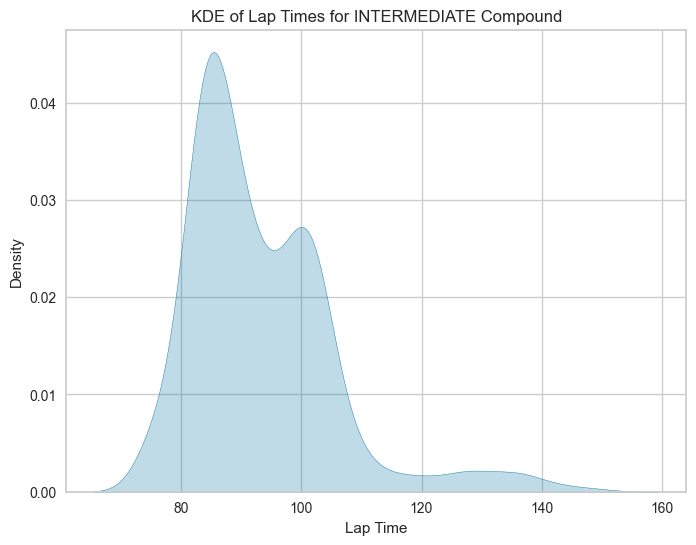

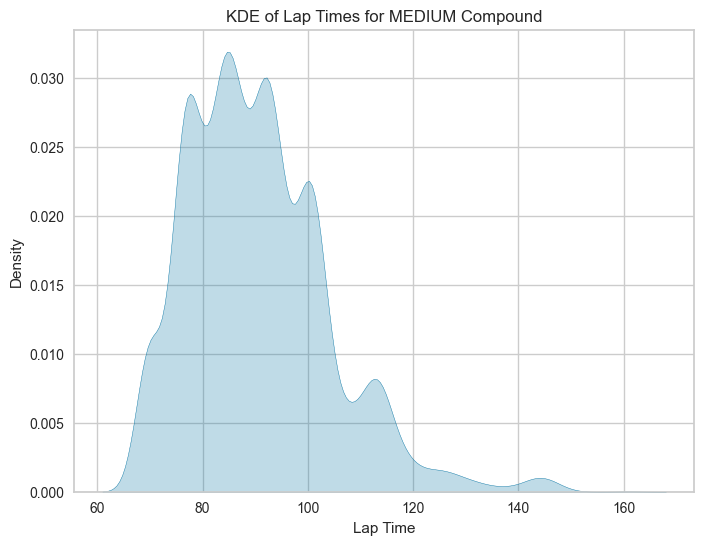

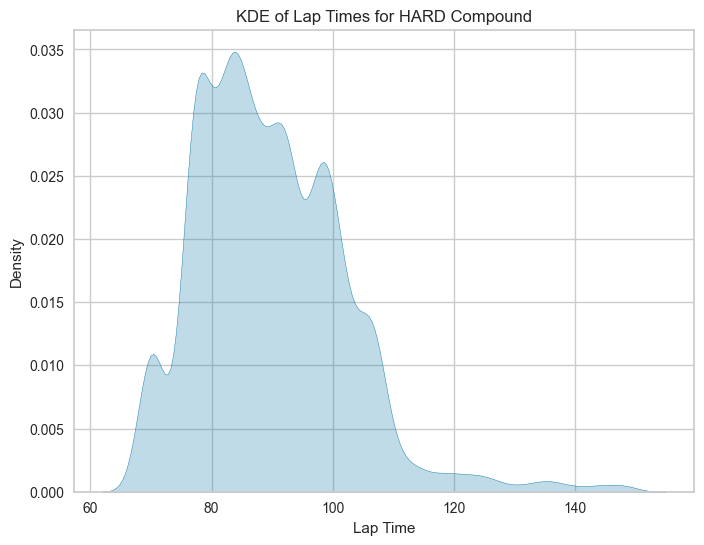

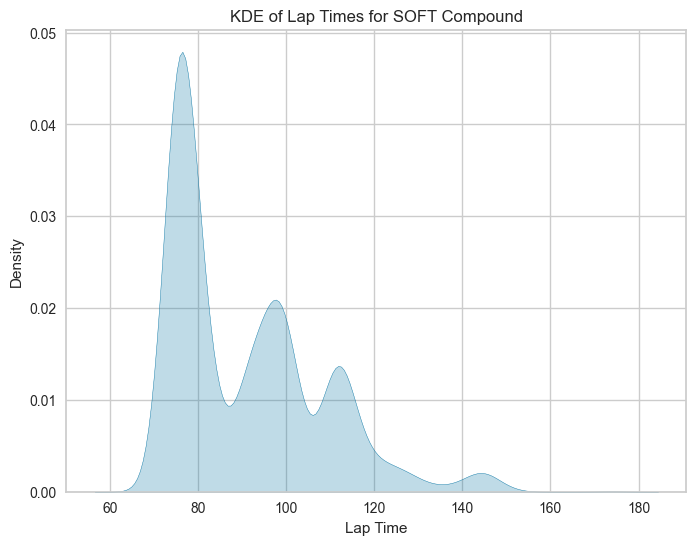

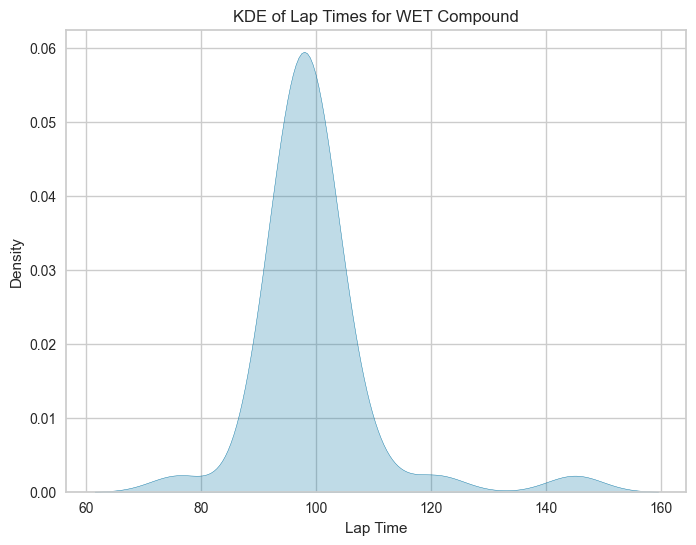

In [145]:
compounds = compount_influence['Compound'].unique()
for compound in compounds:
    plt.figure(figsize=(8, 6))
    subset = compount_influence[compount_influence['Compound'] == compound]['LapTime']
    sns.kdeplot(subset, fill=True)
    plt.title(f'KDE of Lap Times for {compound} Compound')
    plt.xlabel('Lap Time')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

>Berdasarkan KDE plot untuk masing-masing tipe `Compound` terhadap `LapTime`, dapat diketahui bahwa semua tipe `Coumpound` memiliki distribusi positive-skewed. Dengan begitu, central tendency yang dapat digunakan dalam melakukan analisis perbandingan `Compound` terhadap performa mobil F1 berdasarkan `LapTime` adalah **median**.

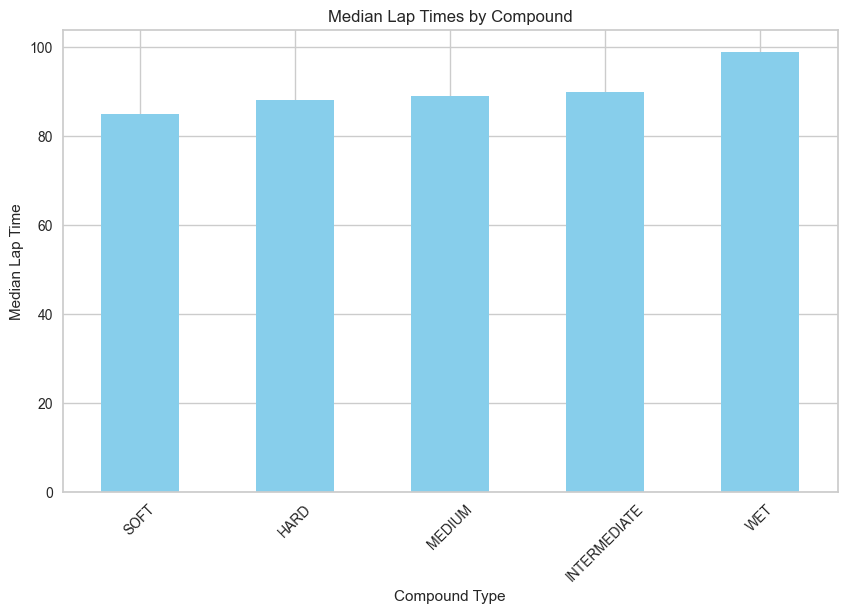

In [146]:
median_laptimes = compount_influence.groupby('Compound')['LapTime'].median()
median_laptimes = median_laptimes.sort_values()
median_laptimes.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Median Lap Times by Compound')
plt.xlabel('Compound Type')
plt.ylabel('Median Lap Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

> Grafik diatas adalah grafik yang menampilkan median `LapTime` dari setiap `Compound` dan diurutkan dari `LapTime` paling cepat hingga `LapTime` paling lambat

>Berdasarkan visualisasi diatas, dapat dianalisis bahwa setiap tipe `Compound` dapat mempengaruhi performa mobil F1 karena menghasilkan `LapTime` yang berbeda-beda. Performa terbaik didapatkan ketika mobil-mobil F1 menggunakan `Compound` bertipe **SOFT**. Lalu, diikuti dengan tipe  `Compound` **HARD, MEDIUM, & INTERMEDIATE** untuk performa terbaik kedua, ketiga, dan keempat. Untuk performa terburuk, didapatkan ketika mobil F1 menggunakan tipe `Compound` **WET**.

Bagaimana ciri-ciri driver dengan kategori posisi ‘Pos_cat’ Podium dibandingkan dengan kategori posisi lainnya?


>Dalam eksplorasi ini, kami memilih kolom `'LapTime'`, `'Compound'`, `'Stint'`, `'SpeedI1'`, `'SpeedI2'`, `'SpeedFL'`, dan`'SpeedST'` sebagai kolom yang akan dicari hubungannya dengan `Pos_cat`. Hal tersebut karena `Pos_cat` itu adalah posisi pembalap ketika mencapai akhir lap dan posisi itu berhubungan dengan waktu yang ditempuh oleh pembalap. Waktu tersebut dapat berhubungan dengan hal seperti kecepatan, pemilihan tipe ban yang tepat, dan stint (sudah berapa lap dia tidak masuk ke pit stop).

In [147]:
exp_poscat = f1_data[['Pos_cat', 'LapTime', 'Compound', 'Stint', 'SpeedI1', 'SpeedI2', 
                       'SpeedFL', 'SpeedST']]
exp_poscat['Pos_cat'] = f1_data['Pos_cat'].map({0:'Participant', 2:'Podium', 1:'Point'})
exp_poscat['Compound'] = exp_poscat['Compound'].map({1: 'INTERMEDIATE', 4: 'MEDIUM', 2: 'HARD', 3: 'SOFT', 0: 'WET'})
exp_poscat.head()

C:\Users\asus\AppData\Local\Temp\ipykernel_1152\3083223719.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_poscat['Pos_cat'] = f1_data['Pos_cat'].map({0:'Participant', 2:'Podium', 1:'Point'})
C:\Users\asus\AppData\Local\Temp\ipykernel_1152\3083223719.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_poscat['Compound'] = exp_poscat['Compound'].map({1: 'INTERMEDIATE', 4: 'MEDIUM', 2: 'HARD', 3: 'SOFT', 0: 'WET'})


,Pos_cat,LapTime,Compound,Stint,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,Participant,100.000943,INTERMEDIATE,6.0,283.0,262.0,288.0,296.6188
1,Podium,108.000067,MEDIUM,1.0,199.0,205.0,336.0,321.0000
2,Participant,82.000881,HARD,2.0,275.0,291.0,288.0,289.0000
3,Podium,91.000585,SOFT,1.0,266.0,258.0,274.0,205.0000
4,Point,94.000742,HARD,2.0,274.0,300.0,295.0,308.0000


In [149]:
poscat_podium = exp_poscat[exp_poscat['Pos_cat'] == 'Podium']
poscat_point = exp_poscat[exp_poscat['Pos_cat'] == 'Point']
poscat_participant = exp_poscat[exp_poscat['Pos_cat'] == 'Participant']

In [150]:
poscat_podium.describe()

,LapTime,Stint,SpeedI1,SpeedI2,SpeedFL,SpeedST
count,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000
mean,88.995939,2.151387,260.375856,247.142577,263.938662,293.250066
std,12.976848,1.051195,41.938695,45.325349,35.381124,29.895734
min,67.000012,1.000000,73.000000,53.000000,2.000000,70.000000
25%,79.000104,1.000000,235.000000,218.000000,246.000000,290.000000
50%,87.000718,2.000000,274.000000,257.000000,274.000000,296.618800
75%,97.000843,3.000000,286.000000,280.000000,284.000000,306.000000
max,149.000966,7.000000,341.000000,341.000000,347.000000,348.000000


In [151]:
poscat_point.describe()

,LapTime,Stint,SpeedI1,SpeedI2,SpeedFL,SpeedST
count,7136.000000,7136.000000,7136.000000,7136.000000,7136.000000,7136.000000
mean,89.767174,2.186939,260.749720,247.535314,264.715387,297.225533
std,13.280315,1.066836,43.504258,47.007821,36.266179,28.218452
min,68.000111,1.000000,40.000000,50.000000,3.000000,68.000000
25%,79.000507,1.000000,233.000000,214.000000,246.000000,292.000000
50%,88.000372,2.000000,274.000000,257.000000,274.000000,300.000000
75%,98.000523,3.000000,288.000000,281.000000,288.000000,310.000000
max,149.000326,8.000000,346.000000,342.000000,344.000000,359.000000


In [152]:
poscat_participant.describe()

,LapTime,Stint,SpeedI1,SpeedI2,SpeedFL,SpeedST
count,8586.000000,8586.000000,8586.000000,8586.000000,8586.000000,8586.000000
mean,91.215273,2.376543,259.430585,245.182390,264.682856,297.317090
std,14.036833,1.074165,43.877692,48.115521,35.617396,31.403631
min,68.000529,1.000000,38.000000,56.000000,3.000000,56.000000
25%,80.000462,2.000000,230.000000,204.000000,246.000000,292.000000
50%,90.000000,2.000000,274.000000,255.000000,274.000000,300.000000
75%,100.000191,3.000000,287.000000,281.000000,286.000000,313.000000
max,174.000634,8.000000,355.000000,339.000000,355.000000,361.000000


In [148]:
len(exp_poscat['Stint'].unique())

8

>Pertama-tama, kami memutuskan untuk melihat KDE masing-masing tipe Pos_cat untuk melihat distribusi dari masing-masingnya dan mendapatkan central tendency. Untuk kolom Compound dan Stint tidak ditampilkan KDE plotnya karena Compound merupakan data kategorikal dan Stint merupakan data numerik bertipe diskrit (dapat dilihat nilai uniknya hanya ada 8) sehingga central tendencynya adalah modus.

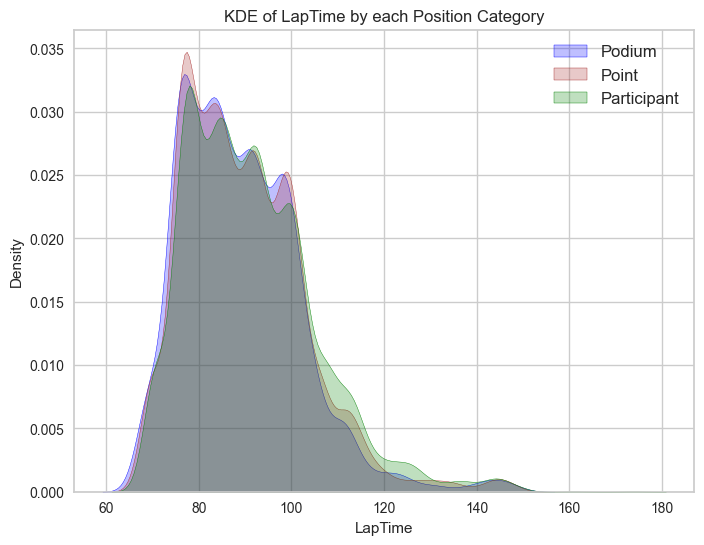

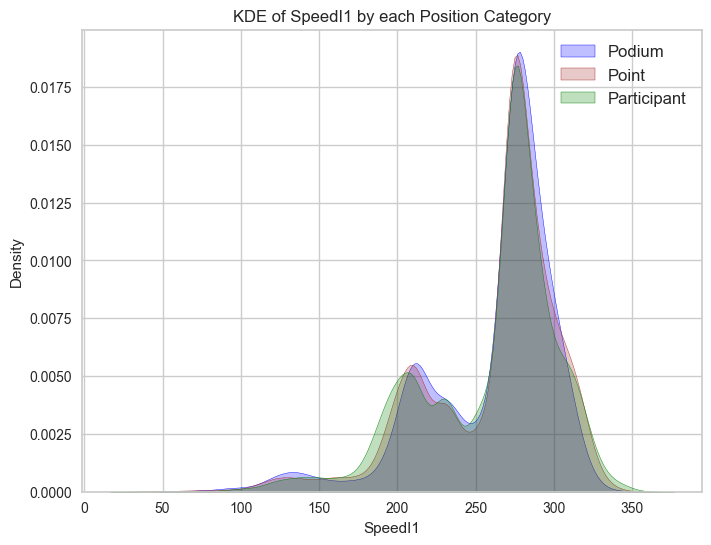

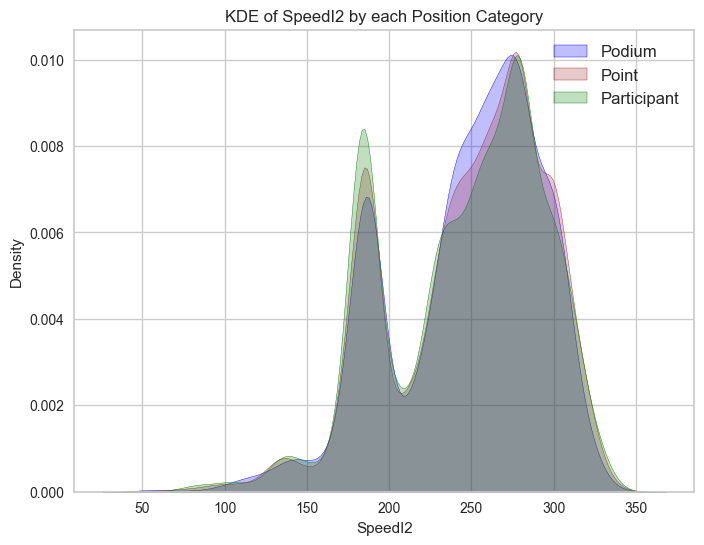

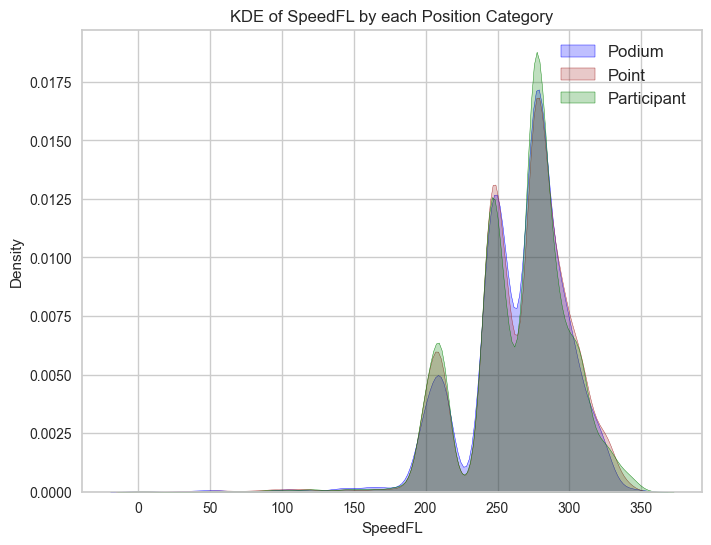

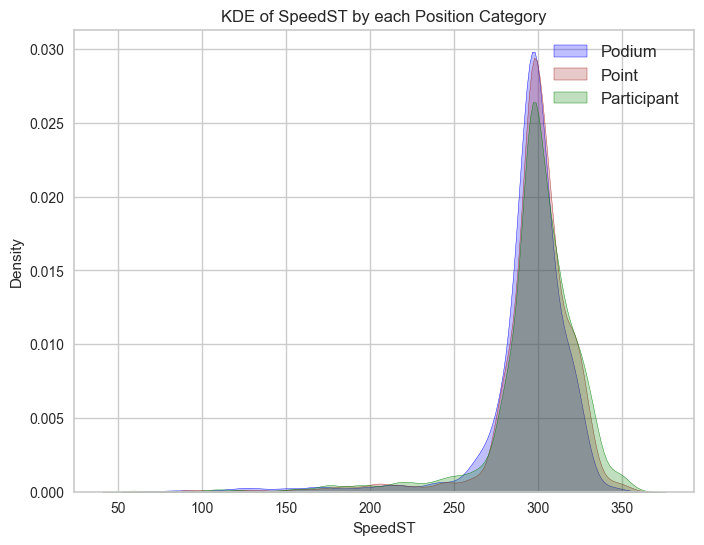

In [153]:
poscats = exp_poscat['Pos_cat'].unique()
non_obj_column = ['LapTime', 'SpeedI1',	'SpeedI2',	'SpeedFL',	'SpeedST']
for column in non_obj_column:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(exp_poscat[exp_poscat['Pos_cat'] == 'Podium'][column], fill=True, color='blue')
    sns.kdeplot(exp_poscat[exp_poscat['Pos_cat'] == 'Point'][column], fill=True, color='brown')
    sns.kdeplot(exp_poscat[exp_poscat['Pos_cat'] == 'Participant'][column], fill=True, color='green')
    plt.legend(['Podium', 'Point', 'Participant'], fontsize=12)
    plt.title(f'KDE of {column} by each Position Category')
    plt.xlabel(f'{column}')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

>Dapat dilihat pada KDE plot di atas, seluruhnya memiliki distribusi skewed, baik negative skewed maupun positive skewed. Oleh karena itu, kami menggunakan median sebagai central tendencynya untuk menganalisis perbandingannya.

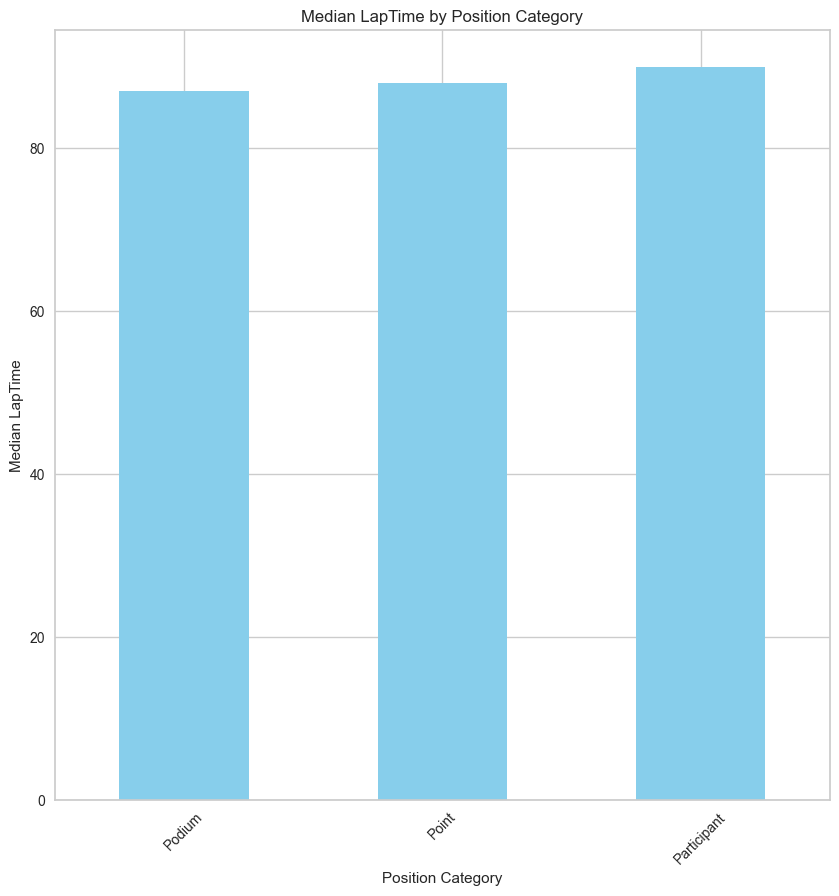

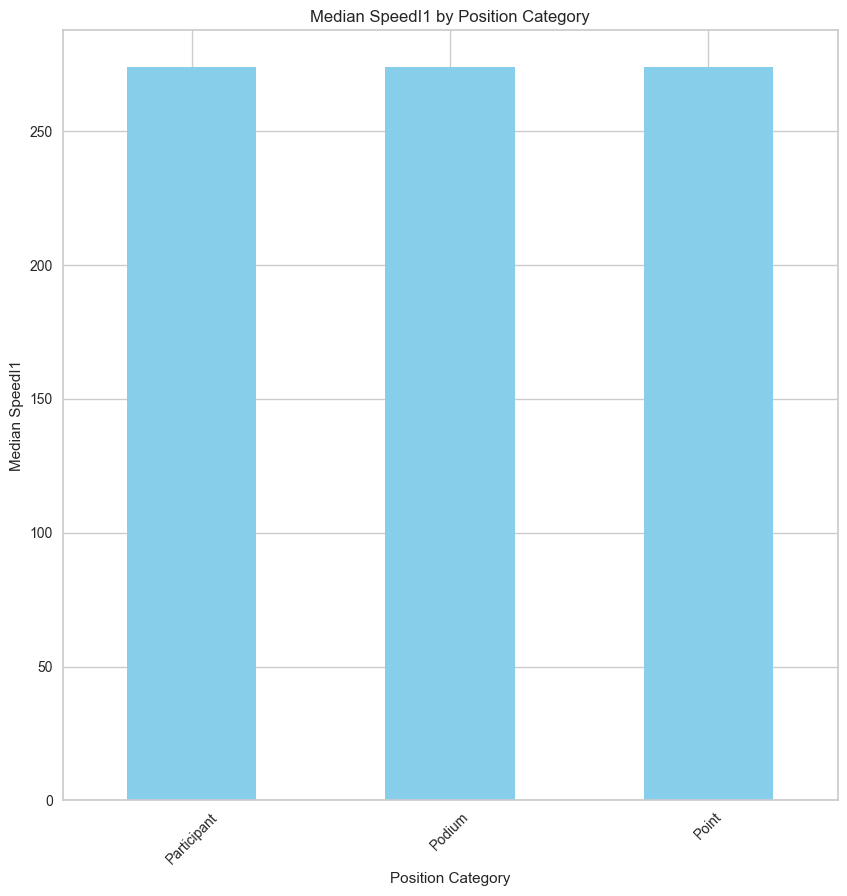

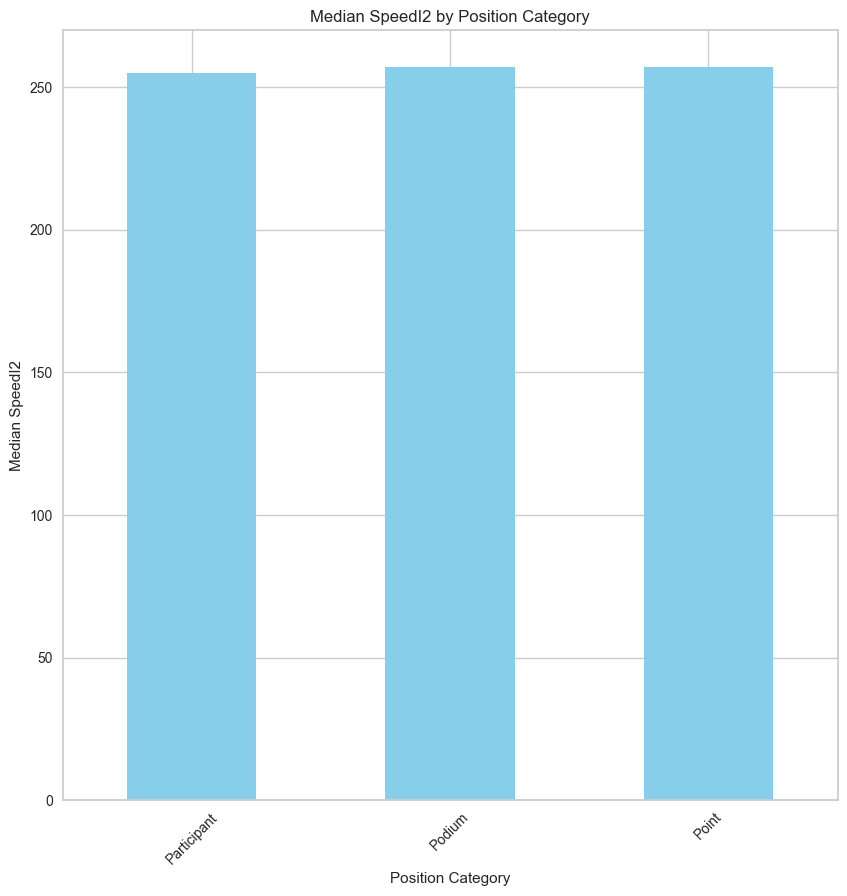

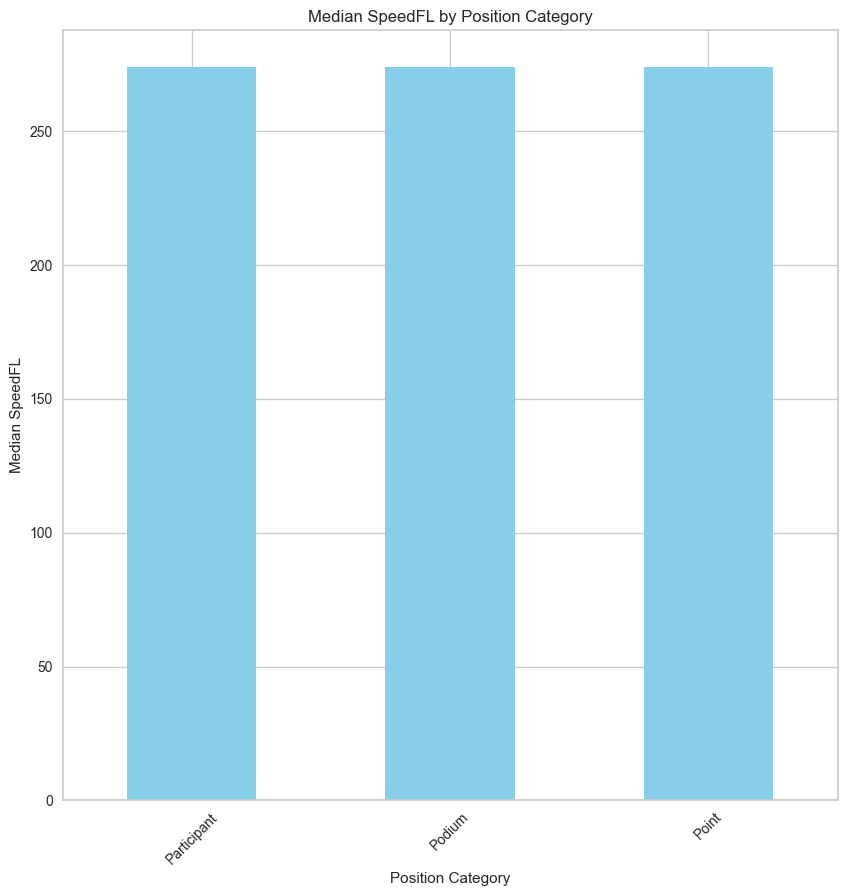

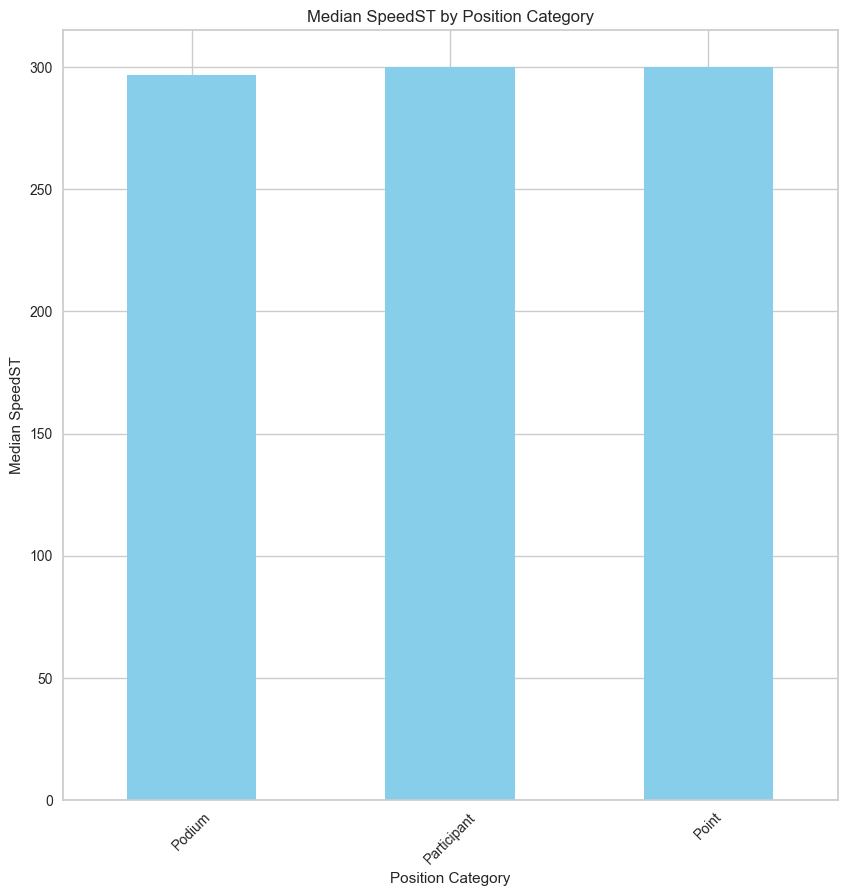

In [154]:
for column in ['LapTime',	'SpeedI1',	'SpeedI2',	'SpeedFL',	'SpeedST']:
    median_poscat = exp_poscat.groupby('Pos_cat')[column].median()
    median_poscat = median_poscat.sort_values() 
    median_poscat.plot(kind='bar', figsize=(10,10 ), color='skyblue')
    plt.title(f'Median {column} by Position Category')
    plt.xlabel('Position Category')
    plt.ylabel(f'Median {column}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

>Kami memilih Bar Plot karena pada konteks tersebut yang dibandingkan adalah kolom kategorikal (Pos_cat) dengan kolom numerik kontinu (kolom yang dilihat mediannya).

>Berdasarkan Bar Plot di atas, dapat dilihat bahwa untuk Pos_cat bertipe Podium memiliki ciri-ciri sebagai berikut:
-	Pos_cat bertipe Podium memiliki nilai LapTime dan SpeedST yang terkecil daripada tipe yang lainnya.
-	Pos_cat bertipe Podium memiliki nilai SpeedI1, SpeedI2, dan SpeedFL diantara tipe yang lainnya.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


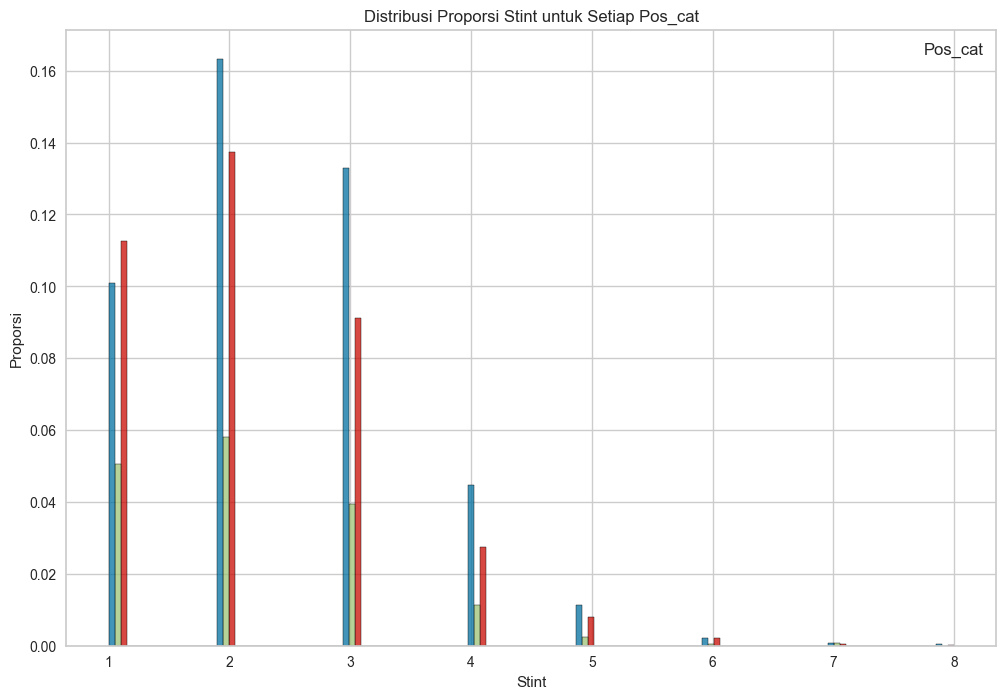

In [305]:
plt.figure(figsize=(12, 8))
sns.histplot(data=exp_poscat, x='Stint', hue='Pos_cat', stat='probability', multiple='dodge')
plt.title('Distribusi Proporsi Stint untuk Setiap Pos_cat')
plt.xlabel('Stint')
plt.ylabel('Proporsi')
plt.legend(title='Pos_cat')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


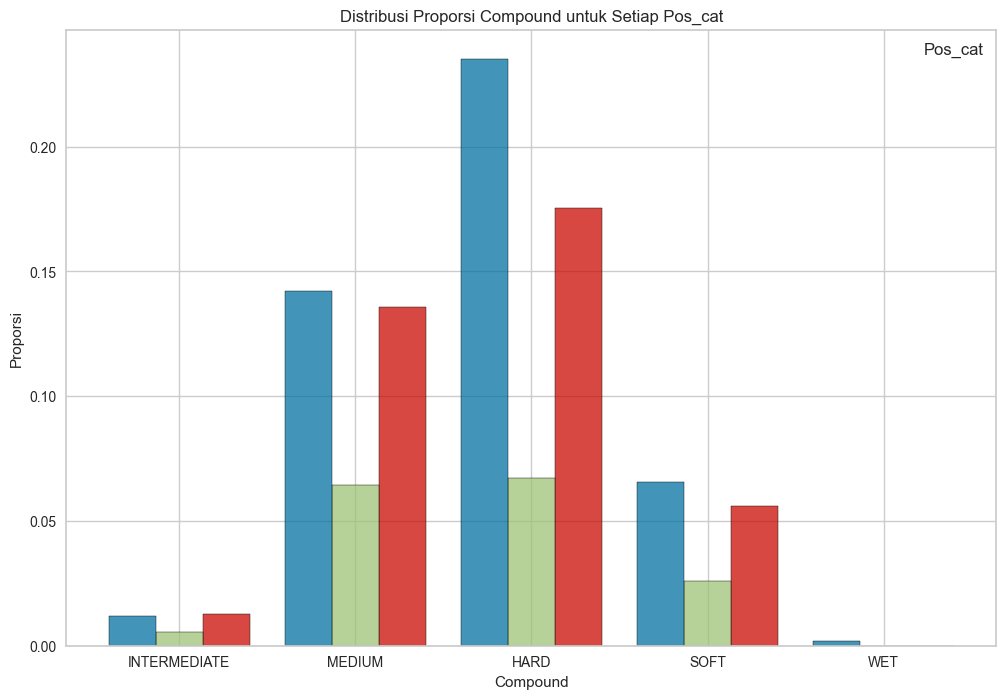

In [307]:
plt.figure(figsize=(12, 8))
sns.histplot(data=exp_poscat, x='Compound', hue='Pos_cat', stat='probability', multiple='dodge', shrink=0.8)
plt.title('Distribusi Proporsi Compound untuk Setiap Pos_cat')
plt.xlabel('Compound')
plt.ylabel('Proporsi')
plt.legend(title='Pos_cat')
plt.show()


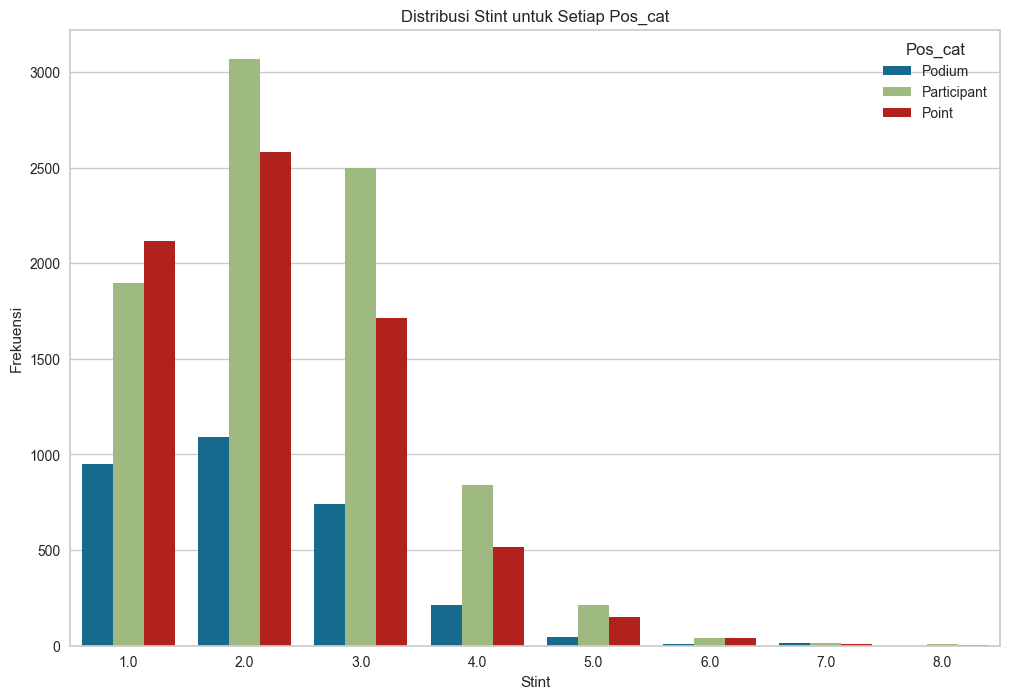

In [294]:
# Plot distribusi Stint untuk setiap Pos_cat
plt.figure(figsize=(12, 8))
sns.countplot(data=exp_poscat, x='Stint', hue='Pos_cat')
plt.title('Distribusi Stint untuk Setiap Pos_cat')
plt.xlabel('Stint')
plt.ylabel('Frekuensi')
plt.legend(title='Pos_cat')
plt.show()


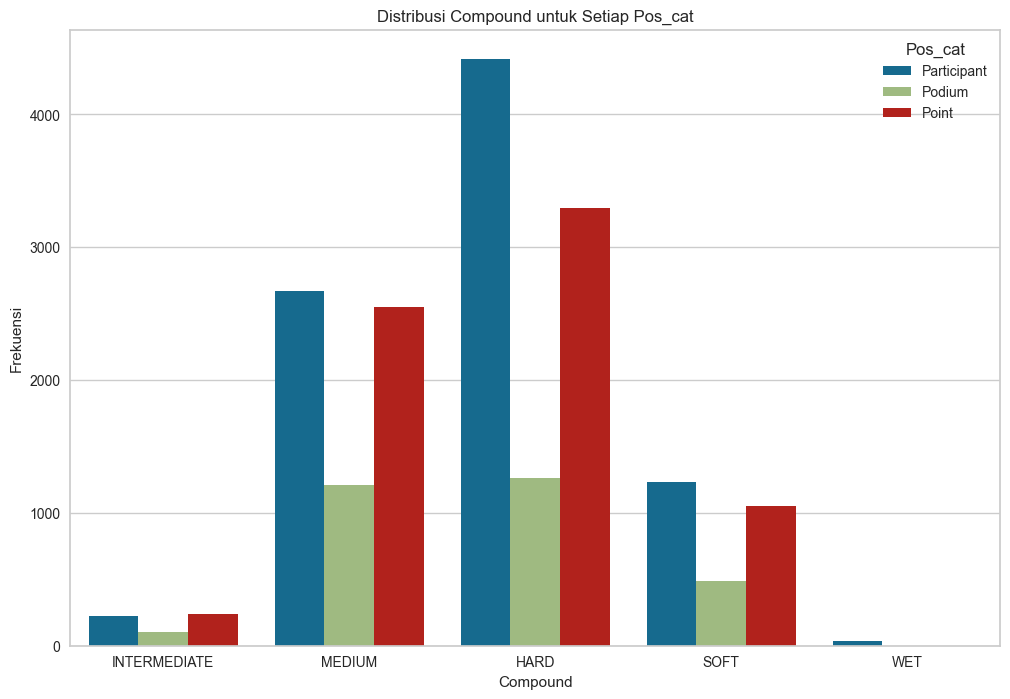

In [295]:
# Plot distribusi Compound untuk setiap Pos_cat
plt.figure(figsize=(12, 8))
sns.countplot(data=exp_poscat, x='Compound', hue='Pos_cat')
plt.title('Distribusi Compound untuk Setiap Pos_cat')
plt.xlabel('Compound')
plt.ylabel('Frekuensi')
plt.legend(title='Pos_cat')
plt.show()


Selanjutnya akan menggunakan Pie Chart untuk membandingkan 2 kolom yang kategorikal

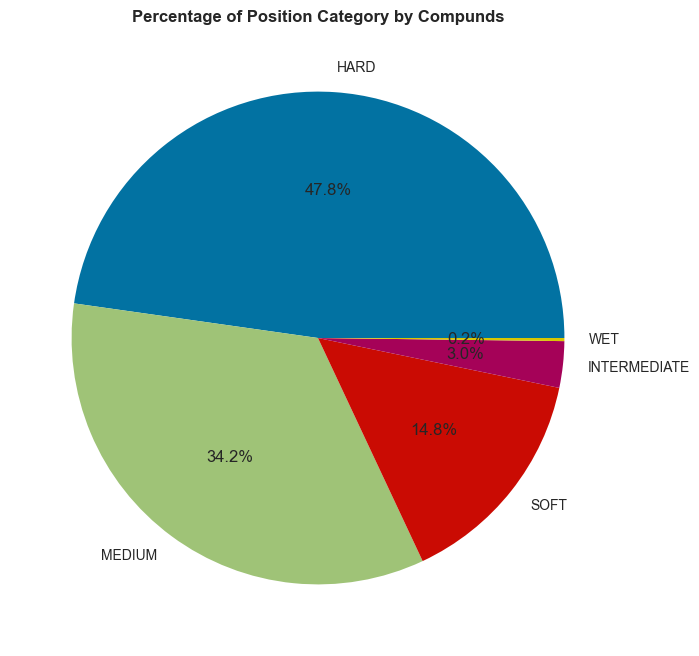

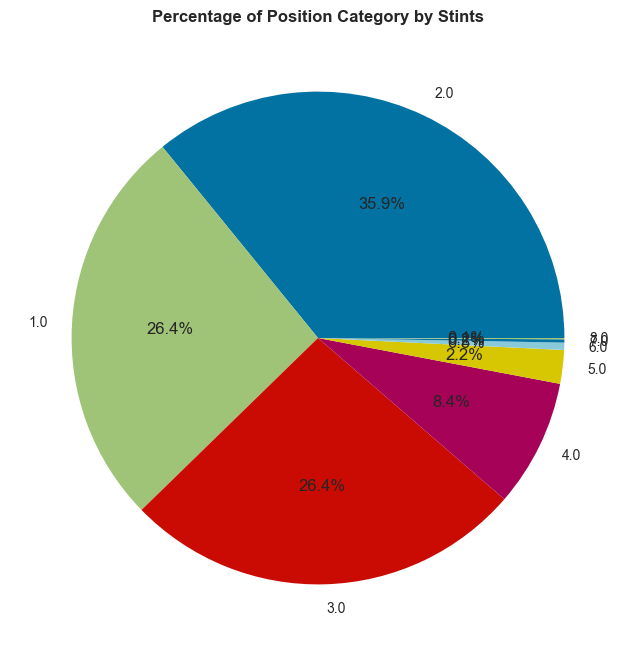

In [293]:
# Calculate the number 
compunds_count = exp_poscat['Compound'].value_counts()
stints_count = exp_poscat['Stint'].value_counts()

# Calculate the percentage
compounds_percentages = (compunds_count / len(exp_poscat)) * 100
stints_percentages = (stints_count / len(exp_poscat)) * 100

# Plot a pie chart
plt.figure(figsize=(10,8))
plt.pie(compounds_percentages, labels=compounds_percentages.index, autopct='%1.1f%%')
plt.title('Percentage of Position Category by Compunds', fontweight="bold")
plt.show()

plt.figure(figsize=(10,8))
plt.pie(stints_percentages, labels=stints_percentages.index, autopct='%1.1f%%')
plt.title('Percentage of Position Category by Stints', fontweight="bold")
plt.show()

Analisis perbedaan ketika sirkuit hujan ‘Rainfall’ atau tidak


Adakah rentang umur ban ‘TyreLife’ dengan performa terbaik dibandingkan rentang umur ban lainnya?


# **REGRESI**

In [156]:
# https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-models-c91c65d73af
def regression_metrics(prediction, y_test):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [157]:
# Kalo butuh feature selection
# mi = mutual_info_regression(X_regression, y_regression)
# mi = pd.Series(mi)
# mi.index = X_regression.columns
# mi.sort_values(ascending=False)

# KBest = math.ceil(0.1 * len(mi.index))

# selector = SelectKBest(f_classif, k=KBest) 
# X_regression = selector.fit_transform(X_regression, y_regression)
# input_features = selector.feature_names_in_
# selector.get_feature_names_out(input_features=input_features)

#### Decision Tree Regressor dengan Hyperparameter Tuning

In [162]:
X_regression = f1_data.drop(columns=['TyreLife'], axis=1)
y_regression = f1_data['TyreLife']

In [163]:
X_regress_train, X_regress_test, y_regress_train, y_regress_test = train_test_split(X_regression, y_regression, test_size=0.3, random_state=42)

>Selanjutnya, kami menginisialisasi range hyper parameter untuk dilakukan hyper parameter tuning.

In [215]:
# Hyper parameters range intialization for tuning 

parameters={'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
            "splitter":["best","random"],
            "max_depth" : [None, 1,3,9, 20],
            'min_samples_split': [0.1, 1, 2, 3, 7],
           "min_samples_leaf":[0.1,1,2,3,7],
           "min_weight_fraction_leaf":[-0.5,-0.3,0.0,0.3,0.5],
           "max_features":["log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,50,90] }

>Selanjutnya, kami menggunakan GridSearchCV untuk mencari parameter terbaik untuk Decision Tree yang sudah dibuat.

In [216]:
# Decision Tree 
dtr_f1 = DecisionTreeRegressor()
dtr_f1.fit(X_regress_train, y_regress_train)

DecisionTreeRegressor()

Kami menggunakan RandomizedSearchCV karena jika menggunakan GridSearchCV total fits yang dilakukan terlalu besar dan memakan waktu terlalu banyak karena parameter yang diuji juga banyak.

In [217]:
# calculating different regression metrics

from sklearn.model_selection import RandomizedSearchCV
tuning_model = RandomizedSearchCV(dtr_f1,param_distributions=parameters,cv=3,n_iter=1000,n_jobs=-1,verbose=3,random_state=42)


In [218]:
tuning_model.fit(X_regress_train,y_regress_train)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1581 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
648 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.p

RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_iter=1000,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [None, 1, 3, 9, 20],
                                        'max_features': ['log2', 'sqrt', None],
                                        'max_leaf_nodes': [None, 10, 20, 30, 50,
                                                           90],
                                        'min_samples_leaf': [0.1, 1, 2, 3, 7],
                                        'min_samples_split': [0.1, 1, 2, 3, 7],
                                        'min_weight_fraction_leaf': [-0.5, -0.3,
                                                                     0.0, 0.3,
                                                                     0.5],
                                        'splitter': ['best', 'random']},
                   random_state=42, verbose=3)

In [219]:
tuning_model.best_params_

{'splitter': 'best',
 'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 2,
 'min_samples_leaf': 7,
 'max_leaf_nodes': None,
 'max_features': None,
 'max_depth': None,
 'criterion': 'poisson'}

>Dengan menggunakan RandomizedSearchCV, didapatkan hyperparameter terbaik seperti di atas. Selanjutnya akan digunakan sebagai parameter pada Decision Tree di bawah.

In [220]:
best_hp = DecisionTreeRegressor(**tuning_model.best_params_)
best_hp.fit(X_regress_train, y_regress_train)
predicted = best_hp.predict(X_regress_test)
regression_metrics(predicted, y_regress_test)

MAE: 2.402637127916532
MSE: 16.86468206048851
RMSE: 4.106663129657521
R_squared: 0.8388366931997152


>Karena kami menggunakan RandomizedSearchCV, setiap percobaan akan menghasilkan nilai metrik yang berbeda. Kami berhasil menemukan nilai metrik yang mampu meningkatkan perfoma model dengan best parameter yang dihasilkan oleh RandomizedSearchCV sebagai berikut.

>{'splitter': 'best',
 'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 2,
 'min_samples_leaf': 7,
 'max_leaf_nodes': None,
 'max_features': None,
 'max_depth': None,
 'criterion': 'poisson'} 


# **KLASIFIKASI**

Klasifikasi digunakan untuk membuat model dengan target `Pos_cat`

In [175]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score

def classification_metrics(prediction, y_test):
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print(f'Accuracy: {accuracy_score(y_test, prediction)}')
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [176]:
#Kalo butuh feature Selection
# mi = mutual_info_classif(X_classification, y_classification)
# mi = pd.Series(mi)
# mi.index = X_classification.columns
# mi.sort_values(ascending=False)

# KBest = math.ceil(0.2 * len(mi.index))

# selector = SelectKBest(f_classif, k=KBest) 
# X_classification = selector.fit_transform(X_classification, y_classification)
# input_features = selector.feature_names_in_
# selector.get_feature_names_out(input_features=input_features)

### Model Decision Tree

#### Decision Tree dengan Hyperparameter Tuning

In [221]:
# Split dan seleksi fitur Dataset Klasifikasi
X_classification = f1_data.drop(columns=['Pos_cat'], axis=1)
y_classification = f1_data['Pos_cat']

In [222]:
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_classification, y_classification, test_size=0.3, random_state=42)

In [223]:
# Decision Tree
dtc_f1 = DecisionTreeClassifier()
dtc_f1.fit(X_class_train, y_class_train)

DecisionTreeClassifier()

In [262]:
# Hyper parameters range intialization for tuning 

parameters_dtc={'criterion': ['gini', 'entropy', 'log_loss'],
            "splitter":["best","random"],
            "max_depth" : [None, 1,3,9, 20],
            'min_samples_split': [0.1,0.5, 0.9, 3,4, 7],
           "min_samples_leaf":[0.1,1,2,3,7, 20],
           "min_weight_fraction_leaf":[0.0,0.3,0.5],
           "max_features":["log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,50,90] }

Kami menggunakan RandomizedSearchCV karena jika menggunakan GridSearchCV total fits yang dilakukan terlalu besar dan memakan waktu terlalu banyak karena parameter yang diuji juga banyak.

In [265]:

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
tuning_model_dtc = RandomizedSearchCV(dtc_f1,param_distributions=parameters_dtc,cv=3,n_iter=10000,n_jobs=-1,verbose=3,random_state=42)


In [266]:
tuning_model_dtc.fit(X_class_train,y_class_train)

Fitting 3 folds for each of 10000 candidates, totalling 30000 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=10000,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 1, 3, 9, 20],
                                        'max_features': ['log2', 'sqrt', None],
                                        'max_leaf_nodes': [None, 10, 20, 30, 50,
                                                           90],
                                        'min_samples_leaf': [0.1, 1, 2, 3, 7,
                                                             20],
                                        'min_samples_split': [0.1, 0.5, 0.9, 3,
                                                              4, 7],
                                        'min_weight_fraction_leaf': [0.0, 0.3,
                                                                     0.5],
                                        'splitter': ['best', 'random']},
                   random_state=42, verbose=3)

In [267]:
tuning_model_dtc.best_params_

{'splitter': 'best',
 'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_leaf_nodes': None,
 'max_features': None,
 'max_depth': None,
 'criterion': 'gini'}

In [268]:
best_hp_dtc = DecisionTreeClassifier(**tuning_model_dtc.best_params_)
best_hp_dtc.fit(X_class_train, y_class_train)
predicted_dtc = best_hp_dtc.predict(X_class_test)
classification_metrics(predicted_dtc, y_class_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      2589
           1       0.65      0.67      0.66      2133
           2       0.63      0.59      0.61       915

    accuracy                           0.71      5637
   macro avg       0.69      0.68      0.68      5637
weighted avg       0.71      0.71      0.71      5637



Confusion Matrix



prediction,0,1,2
actual,,,
0,2034,480,75
1,453,1434,246
2,79,299,537




Accuracy: 0.7104843001596594
F1 Macro Average: 0.6849356289063562
F1 Micro Average: 0.7104843001596594
Precision Macro Average: 0.6888455675117712
Precision Micro Average: 0.7104843001596594
Recall Macro Average: 0.6816031031908363
Recall Micro Average: 0.7104843001596594



>Setelah berbagai percobaan, kami tidak berhasil menemukan best parameter yang dihasilkan oleh RandomizedSearchCV yang lebih baik dari pada model Decision Tree biasa. Akan tetapi, tidak menutup kemungkinan bahwa terdapat best parameter yang memiliki performa yang lebih signifikan daripada Decision Tree biasa.

#### Softmax Regression

In [272]:
X_softmax = f1_data.drop(columns=['Pos_cat'], axis=1)
y_softmax = f1_data['Pos_cat']


In [273]:
X_softmax_train, X_softmax_test, y_softmax_train, y_softmax_test = train_test_split(X_softmax, y_softmax, test_size = 0.2, random_state = 12)

In [274]:
#Standarisasi
scaler = MinMaxScaler()

X_softmax_train = scaler.fit_transform(X_softmax_train)
X_softmax_test = scaler.transform(X_softmax_test)

In [275]:
# Melatih model softmax regression menggunakan Scikit-learn pada training set

softmax = LogisticRegression(multi_class='multinomial')
softmax.fit(X_softmax_train, y_softmax_train)

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [276]:
# Melakukan percobaan prediksi model softmax regression menggunakan data testing 

y_softmax_predict = softmax.predict(X_softmax_test)
y_softmax_predict

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

>Selanjutnya, kita melihat decision boundary yang dihasilkan oleh model tersebut (w0, w1, dan w2) yang merepresentasikan tiap boundary.

In [271]:
# Mendapatkan intercept dan koefisien sebagai w0, w1, dan w2.
softmax.intercept_, softmax.coef_
print(softmax.intercept_, softmax.coef_)

[ 8.05236306e-07 -3.16627646e-07 -4.88608660e-07] [[ 1.52080090e-03  1.36453540e-03  2.50349185e-04  4.21409157e-04
   2.08647664e-04  3.75010030e-04 -1.93359024e-05 -1.16397260e-03
   3.14589650e-05 -2.63363153e-04 -1.04635549e-03  1.85360372e-04
   1.42119226e-03 -1.30040299e-04 -1.20374317e-03 -3.80689928e-04
   1.72978926e-05 -2.50382443e-04  1.02356847e-04 -1.98672424e-04
   2.56827942e-04  1.42848727e-05 -1.11831316e-05 -3.24460119e-06
   1.94229001e-06  3.99882541e-06]
 [-7.26550592e-04 -4.61175891e-04 -1.61670114e-04 -1.78523312e-04
   7.52753661e-05 -1.57182855e-04  1.26454801e-04  1.01758963e-03
  -1.51476476e-04  8.95692009e-05  2.21474672e-04 -2.41182082e-05
   4.35171542e-04  6.10742841e-05  8.34286574e-04 -2.53043901e-04
  -2.05241460e-05  2.31876880e-04  5.70504791e-06  1.53314014e-04
  -1.68629574e-04  3.69961473e-06  1.42135271e-05  3.27968843e-06
   6.22689974e-07 -1.48375106e-06]
 [-7.94250306e-04 -9.03359510e-04 -8.86790716e-05 -2.42885844e-04
  -2.83923030e-04 -2.1

In [277]:
def confusion_matrix(model_name, test, prediction):
    print(f"Confusion Matrix from {model_name}")
    y_actual = pd.Series(np.array(test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)

In [278]:
confusion_matrix('Softmax Regression', y_softmax_test, y_softmax_predict)

Confusion Matrix from Softmax Regression


prediction,0,1,2
actual,,,
0,1255,459,4
1,811,615,2
2,345,264,3


In [279]:
def evaluate_classification_model(model_name, test, prediction):
    print(f"Classification model evaluation from {model_name}")
    print('Accuracy:', accuracy_score(test, prediction))
    print('F1 Macro Average:', f1_score(test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(test, prediction, average='micro',zero_division=0))

In [280]:
evaluate_classification_model('Softmax Regression', y_softmax_test, y_softmax_predict)

Classification model evaluation from Softmax Regression
Accuracy: 0.49840340606705696
F1 Macro Average: 0.35408089210294785
F1 Micro Average: 0.49840340606705696
Precision Macro Average: 0.43783516299339703
Precision Micro Average: 0.49840340606705696
Recall Macro Average: 0.38869160392135127
Recall Micro Average: 0.49840340606705696


>Dapat dilihat pada hasil di atas, Accuracy, F1 Macro, dan F1 Micro yang dihasilkan menggunakan Softmax Regression terlalu kecil sehingga model ini tidak sesuai untuk dataset f1. Hal tersebut terjadi diantaranya karena dataset yang tidak seimbang yang menyebabkan nilai f1 macronya kecil.

#### Naive Bayes

Pertama-tama, kami menentukan model Naive Bayes yang sesuai untuk dataset f1_train. Untuk dataset ini, kebanyakan kolomnya adalah data yang bertipe numerik kontinu seperti  `LapTime`, `Sector1Time`, `Sector2Time`, `Sector3Time`, `SpeedI1`, `SpeedI2`, `SpeedFL`, `SpeedST`, dan berbagai fitur numerik lainnya sehingga kami menentukan Gaussian Naive Bayes yang akan digunakan. Selain karena dataset yang mayoritas numerik, Gaussian Naive Bayes adalah model yang sederhana dan cepat dalam hal pelatihan dan prediksi, karena hanya membutuhkan estimasi mean dan varians dari fitur untuk setiap kelas. Ini sangat efisien untuk dataset besar dengan banyak fitur numerik seperti dataset f1 ini.

In [283]:
f1_data.head(10)

,Time,LapTime,Stint,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,...,Humidity,Pressure,TrackTemp,WindDirection,WindSpeed,Pos_cat,IsPersonalBest_True,FreshTyre_True,Deleted_True,Rainfall_True
0,8785.000496,100.000943,6.0,46.000163,28.000979,25.000801,8736.000926,8765.000905,8791.000706,283.0,...,68.0,1008.0,24.8,157,3.0,0,False,False,False,False
1,4431.000732,108.000067,1.0,39.000129,43.000601,25.000337,4362.000794,4406.000395,4431.000732,199.0,...,49.0,1008.5,43.3,275,1.0,2,False,True,False,False
2,8555.000139,82.000881,2.0,28.000890,18.000554,35.000437,8501.000150,8519.000704,8555.000141,275.0,...,57.0,1018.2,29.9,0,0.6,0,True,True,False,False
3,3816.000822,91.000585,1.0,28.000315,28.000929,30.000478,3898.000279,3786.000412,3816.000927,266.0,...,67.0,1007.7,29.5,135,1.8,2,False,True,False,False
4,6340.000072,94.000742,2.0,34.000895,29.000874,29.000973,6280.000174,6310.000048,6340.000021,274.0,...,55.0,1011.0,31.0,271,1.3,1,False,True,False,False
5,6477.000993,93.000356,1.0,29.000956,37.000772,25.000628,6414.000580,6452.000352,6477.000980,289.0,...,61.0,1001.4,33.3,212,1.6,0,True,True,False,False
6,4971.000219,124.000051,1.0,33.000197,45.000886,44.000968,4880.000349,4926.000235,4971.000203,87.0,...,61.0,1011.4,34.1,351,1.8,1,False,True,False,False
7,6349.000244,95.000686,2.0,35.000711,30.000120,29.000855,6289.000092,6319.000212,6349.000067,284.0,...,55.0,1011.0,31.0,271,1.3,0,False,True,False,False
8,7587.000002,76.000662,2.0,25.000919,27.000596,23.000147,7536.000224,7563.000820,7586.000967,287.0,...,68.0,1007.7,26.4,184,2.9,1,False,True,False,False
9,6918.000003,77.000438,2.0,21.000462,24.000908,31.000068,6862.000025,6886.000933,6918.000001,254.0,...,62.0,1011.5,32.3,324,1.8,2,False,True,False,False


In [284]:
x = f1_data.drop(columns=['Pos_cat'], axis=1)
y = f1_data['Pos_cat']


In [285]:
# Melakukan splitting terhadap data train dan test (0.2 test_size)

from sklearn.model_selection import train_test_split, KFold, cross_val_score

x_nb_train, x_nb_test, y_nb_train, y_nb_test = train_test_split(x, y, test_size = 0.2, stratify=y,random_state = 42)

In [287]:
#Standarisasi
scaler = MinMaxScaler()

x_nb_train = scaler.fit_transform(x_nb_train)
x_nb_test = scaler.transform(x_nb_test)

Melakukan cross validation untuk dapat menghasilkan model yang lebih stabil performance-nya serta dapat juga digunakan untuk menghindari overfitting data.

In [286]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

Membuat Naive Bayes

In [288]:
from sklearn.naive_bayes import GaussianNB
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = GaussianNB()

In [289]:
scores = cross_val_score(modelnb, x_nb_train, y_nb_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation:{scores.mean()}')

Hasil Evaluasi cross validation:0.4575158501632342


In [290]:
modelnb.fit(x_nb_train, y_nb_train)

GaussianNB()

In [291]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score


def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Butuh informasi lebih lengkap? silakan simak di bawah ini : ")
    print('Accuracy Average:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [292]:
y_pred_nb = modelnb.predict(x_nb_test)
evaluate_classifier_performance(y_pred_nb,y_nb_test)


Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.53      0.61      0.56      1718
           1       0.42      0.51      0.46      1427
           2       0.23      0.02      0.04       613

    accuracy                           0.47      3758
   macro avg       0.39      0.38      0.36      3758
weighted avg       0.44      0.47      0.44      3758



Confusion Matrix



prediction,0,1,2
actual,,,
0,1041,654,23
1,680,721,26
2,261,337,15




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.47285790313996806
F1 Macro Average: 0.3554659392386505
F1 Micro Average: 0.47285790313996806
Precision Macro Average: 0.39358230106786624
Precision Micro Average: 0.47285790313996806
Recall Macro Average: 0.378554246039678
Recall Micro Average: 0.47285790313996806



>Berdasarkan nilai Accuracy, F1 Macro, dan F1 Micro yang dihasilkan, ternyata sangat kecil sehingga membuat kesimpulan bahwa penggunaan Gaussian Naive Bayes tidak sesuai untuk dataset ini. Hal tersebut terjadi diantaranya karena dataset yang tidak seimbang yang menyebabkan nilai f1 macronya kecil.